<a href="https://colab.research.google.com/github/mateuszklimczyk97/data-science-bootcamp/blob/main/06_uczenie_maszynowe/06_regresja_logistyczna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import bibliotek


In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Regresja Logistyczna (Logistic Regression) - wprowadzenie

Pomimo nazwy jest to liniowy model do zadań klasyfikacyjnych. Inna nazwa Logit Regression.
Przykłady zastosowań:
*    przewidywanie czy mail jest spamem, czy też nie
*    przewidywanie czy użytkownik kliknie w reklamę
*    przewidywanie czy nowotwór jest złośliwy czy też nie
*    przewidywanie czy dłużnik spłaci wierzycielowi dług, czy też zajdzie zdarzenie default
*    przewidywanie czy transakcja jest próbą oszustwa

Przy budowie modelu regresji logistycznej wykorzystamy funkcję sigmoid. Definiuje się ją wzorem: 
$$sigmoid(x) = \frac{1}{1+e^{-x}}$$

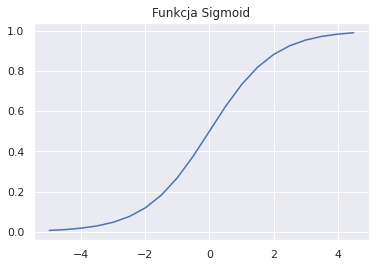

In [ ]:
sns.set()
np.random.randn(10)
np.set_printoptions(precision=6, suppress = True)

def sigmoid(x):
  return 1/(1+np.exp(-x))

X = np.arange(-5,5,0.5)
y = sigmoid(X)
plt.title('Funkcja Sigmoid')
_ = plt.plot(X,y)



Następnie rozważmy model liniowy $Y = w_0 + w_1X_1$
.Podstawiając to do funkcji sigmoid otrzymujemy:
$$LOG\_REG(Y) = \frac{1}{1 + e^{-(w_0 + w_1X_1)}}$$
Dzięki temu przekształceniu regresja logistyczna zwraca nam wartości z przedziału $(0,1)$ co możemy interpretować jako prawdopodobieństwo i na podstawie tych prawdopodobieństw przewidywać poszczególne klasy.

### Załadowanie danych

In [ ]:
from sklearn.datasets import load_breast_cancer #dane raka piersi

data = load_breast_cancer()
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [ ]:
X = data.data
y = data.target

print(f'shape X: {X.shape}')
print(f'shape y: {y.shape}')

shape X: (569, 30)
shape y: (569,)


In [ ]:
df = pd.DataFrame(data=X, columns=data.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### Podział danych na zbiór treningowy i testowy##########dsdsadsdsadsasdsaddwadsadsadsaddaaaaaaaaasdssdsd#

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {X_test.shape}')

X_train shape: (426, 30)
X_test shape: (143, 30)
y_train shape: (426,)
y_test shape: (143, 30)


### Dopasowanie modelu

In [15]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### Predykcja na podstawie modelu

In [17]:
y_prob = classifier.predict_proba(X_test)
y_prob

array([[0.001432, 0.998568],
       [0.000168, 0.999832],
       [0.036583, 0.963417],
       [0.009602, 0.990398],
       [0.894432, 0.105568],
       [0.033763, 0.966237],
       [0.094628, 0.905372],
       [1.      , 0.      ],
       [0.002764, 0.997236],
       [0.00675 , 0.99325 ],
       [0.253453, 0.746547],
       [0.022092, 0.977908],
       [0.132055, 0.867945],
       [1.      , 0.      ],
       [1.      , 0.      ],
       [0.07071 , 0.92929 ],
       [0.050145, 0.949855],
       [0.000731, 0.999269],
       [0.00007 , 0.99993 ],
       [0.064922, 0.935078],
       [0.009147, 0.990853],
       [0.996654, 0.003346],
       [0.000122, 0.999878],
       [0.039543, 0.960457],
       [0.002261, 0.997739],
       [1.      , 0.      ],
       [0.001514, 0.998486],
       [0.025136, 0.974864],
       [0.003897, 0.996103],
       [0.001394, 0.998606],
       [0.999828, 0.000172],
       [0.002752, 0.997248],
       [0.003955, 0.996045],
       [0.027655, 0.972345],
       [0.0006

In [18]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0])

### Ocena modelu

Accuracy: 0.9370629370629371


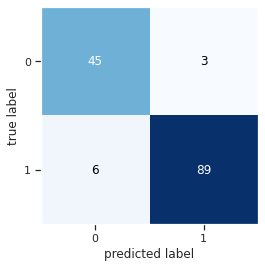

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
sns.set()

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm)

acc = accuracy_score(y_test,y_pred)
print(f'Accuracy: {acc}')

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.88      0.94      0.91        48
      benign       0.97      0.94      0.95        95

    accuracy                           0.94       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

